In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

<H2> Originality Data </H2>

In [2]:
df = pd.read_csv('../datasets/Originality.csv')
automation = pd.read_csv('../datasets/raw_state_automation_data.csv', encoding='cp1252')

df
df['SOC'] = df['Code'].astype(str).replace('\.00', '', regex=True)
automation

merged_df = pd.merge(left=df, right=automation, left_on='SOC', right_on='SOC')
merged_df.sort_values(by=['SOC'])

,Importance,Level,Code,Occupation_x,SOC,Occupation_y,Probability,Alabama,Alaska,Arizona,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
12,72,61,11-1011.00,Chief Executives,11-1011,Chief Executives,0.015,1030,760,5750,...,560,5460,5890,3650,280,6320,5910,980,3740,160
156,50,48,11-1021.00,General and Operations Managers,11-1021,General and Operations Managers,0.160,26930,6490,43300,...,3730,44400,168610,36200,2760,52380,43760,10200,32350,4840
22,69,55,11-2011.00,Advertising and Promotions Managers,11-2011,Advertising and Promotions Managers,0.039,50,40,470,...,0,670,1210,380,40,240,640,40,200,0
40,66,57,11-2021.00,Marketing Managers,11-2021,Marketing Managers,0.014,530,200,4790,...,60,3400,9570,2320,380,3840,5830,260,2980,30
44,66,55,11-2022.00,Sales Managers,11-2022,Sales Managers,0.013,2510,400,10650,...,300,8890,22310,3360,480,5360,7390,600,5730,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,28,30,53-7072.00,"Pump Operators, Except Wellhead Pumpers",53-7072,Pump Operators; Except Wellhead Pumpers,0.900,0,0,0,...,0,130,3780,0,0,0,0,110,80,0
531,28,25,53-7073.00,Wellhead Pumpers,53-7073,Wellhead Pumpers,0.840,0,0,0,...,0,0,4130,90,0,0,0,550,0,550
516,28,29,53-7081.00,Refuse and Recyclable Material Collectors,53-7081,Refuse and Recyclable Material Collectors,0.930,2070,210,1980,...,430,2230,7760,710,480,3430,1890,970,2140,230
619,19,20,53-7111.00,Mine Shuttle Car Operators,53-7111,Mine Shuttle Car Operators,0.370,50,0,0,...,0,0,0,0,0,0,0,510,0,0


In [3]:
merged_df.drop(['Code', 'Occupation_x'], axis=1, inplace=True)
merged_df

,Importance,Level,SOC,Occupation_y,Probability,Alabama,Alaska,Arizona,Arkansas,California,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,85,66,27-1013,Fine Artists; Including Painters; Sculptors; a...,0.0420,0,0,150,110,3070,...,0,180,600,150,0,260,420,0,140,0
1,78,79,19-2012,Physicists,0.1000,190,0,70,0,2860,...,0,220,970,30,0,830,460,0,350,0
2,78,63,27-1011,Art Directors,0.0230,280,0,400,60,6500,...,0,280,1740,350,80,680,770,40,500,0
3,78,59,27-1027,Set and Exhibit Designers,0.0055,50,0,100,0,3420,...,0,120,530,50,0,240,160,0,110,0
4,78,57,27-1025,Interior Designers,0.0220,490,40,780,210,7390,...,140,840,4970,470,60,1210,1510,100,1200,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,16,14,53-7064,Packers and Packagers; Hand,0.3800,7160,910,10390,4830,99540,...,2120,18510,49080,6240,770,13000,18730,1750,19670,1020
625,16,13,33-3011,Bailiffs,0.3600,80,0,300,100,290,...,0,340,830,120,0,510,180,50,200,0
626,16,13,51-6041,Shoe and Leather Workers and Repairers,0.5200,50,0,0,0,640,...,0,180,1470,130,0,180,120,0,280,0
627,13,9,53-7061,Cleaners of Vehicles and Equipment,0.3700,5420,530,7080,3330,49270,...,1220,5690,35180,3780,540,9700,7380,1300,6990,560


In [4]:
#checking to see if there are any missing values
#merged_df.isnull().sum()

In [5]:
# Clean up! 

merged_df=merged_df.rename(columns = {'Occupation_y':'Occupation'})


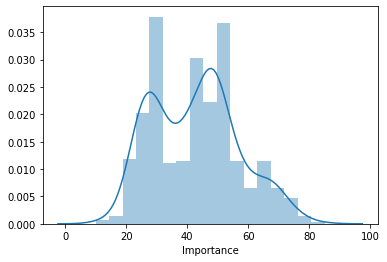

In [6]:
#merged_df.plot.scatter('Probability', 'Importance')
#merged_df.plot.hexbin(x='Probability', y='Importance', gridsize=10)


sns.distplot(merged_df['Importance'][merged_df['Probability'].notnull()],hist=True)
#plt.xlabel('Originality');

#merged_df.corr()

<H2>Persuasion Data</H2>

In [7]:
df2 = pd.read_csv('../datasets/Persuasion.csv')
automation2 = pd.read_csv('../datasets/raw_state_automation_data.csv', encoding='cp1252')

df2
df2['SOC'] = df2['Code'].astype(str).replace('\.00', '', regex=True)
automation2

merged_df2 = pd.merge(left=df2, right=automation2, left_on='SOC', right_on='SOC')
merged_df2.sort_values(by=['SOC'])
merged_df2.drop(['Code', 'Occupation_x'], axis=1, inplace=True)

#Adding data

merged_df2['Persuasion_Importance']= merged_df['Importance']
merged_df2.head(3)

,Importance,Level,SOC,Occupation_y,Probability,Alabama,Alaska,Arizona,Arkansas,California,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Persuasion_Importance
0,81,61,41-9031,Sales Engineers,0.0041,270,70,1360,130,11390,...,950,11620,550,100,1790,1300,40,1450,0,85
1,81,57,41-4011,Sales Representatives; Wholesale and Manufactu...,0.2500,890,500,6910,2840,46150,...,8600,33000,4180,590,6220,4660,750,3720,330,78
2,78,71,11-1011,Chief Executives,0.0150,1030,760,5750,2710,31150,...,5460,5890,3650,280,6320,5910,980,3740,160,78


In [8]:
merged_df2.isnull().sum()

merged_df2=merged_df2.rename(columns = {'Occupation_y':'Occupation'})
merged_df2

,Importance,Level,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Persuasion_Importance
0,81,61,41-9031,Sales Engineers,0.0041,270,70,1360,130,11390,...,950,11620,550,100,1790,1300,40,1450,0,85
1,81,57,41-4011,Sales Representatives; Wholesale and Manufactu...,0.2500,890,500,6910,2840,46150,...,8600,33000,4180,590,6220,4660,750,3720,330,78
2,78,71,11-1011,Chief Executives,0.0150,1030,760,5750,2710,31150,...,5460,5890,3650,280,6320,5910,980,3740,160,78
3,78,66,23-1022,Arbitrators; Mediators; and Conciliators,0.0600,50,0,400,0,900,...,110,450,30,0,0,150,0,160,0,78
4,78,63,11-2022,Sales Managers,0.0130,2510,400,10650,2650,69180,...,8890,22310,3360,480,5360,7390,600,5730,180,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,22,13,51-3023,Slaughterers and Meat Packers,0.6000,240,0,480,2160,4590,...,1800,0,1280,50,1510,1230,80,3950,0,16
625,19,21,51-6031,Sewing Machine Operators,0.8900,3040,40,1600,1000,27850,...,3620,8060,890,170,2420,4320,170,2550,130,16
626,19,18,53-7111,Mine Shuttle Car Operators,0.3700,50,0,0,0,0,...,0,0,0,0,0,0,510,0,0,16
627,19,18,51-6021,Pressers; Textile; Garment; and Related Materials,0.8100,740,0,670,380,6960,...,740,6140,140,0,1420,840,110,470,50,13


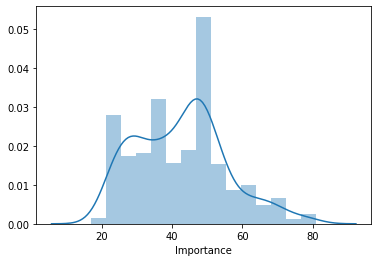

In [9]:
#merged_df2.plot.scatter('Probability', 'Importance')
sns.distplot(merged_df2['Importance'][merged_df['Probability'].notnull()],hist=True)

<h2>Finger Dexterity Data</h2>

In [10]:
df3 = pd.read_csv('../datasets/Originality.csv')
automation3 = pd.read_csv('../datasets/raw_state_automation_data.csv', encoding='cp1252')

df3['SOC'] = df3['Code'].astype(str).replace('\.00', '', regex=True)

merged_df3 = pd.merge(left=df3, right=automation3, left_on='SOC', right_on='SOC')

merged_df3.sort_values(by=['SOC'])

merged_df3.drop(['Code', 'Occupation_x'], axis=1, inplace=True)

merged_df3 = merged_df3.rename(columns = {'Occupation_y':'Occupation'})


In [ ]:
#automation1of3 = incomeANDautomation.loc[incomeANDautomation.Automation <= 0.35]
merged_df3low = merged_df3.loc[merged_df3['Probability'] <= 0.33]
merged_df3medium = merged_df3.loc[(merged_df3['Probability'] > 0.33) & (merged_df3['Probability'] <= 0.66)]
merged_df3high = merged_df3.loc[merged_df3['Probability'] < 0.66]
#merged_df3low
#boxplot = merged_df3low.boxplot(column=['Importance'])
allValues = [merged_df3low, merged_df3medium, merged_df3high]
allMerged = pd.concat(allValues)
#plt.figure()
boxplot = allMerged.boxplot(by='Probability')

In [ ]:
#boxplot = merged_df3medium.boxplot(column=['Importance'])

In [ ]:
merged_df3.plot.scatter('Probability', 'Importance')

<h2>Manual Dexterity Data</h2>

In [ ]:
df4 = pd.read_csv('../datasets/Manual_Dexterity.csv')
automation4 = pd.read_csv('../datasets/raw_state_automation_data.csv', encoding='cp1252')

df4['SOC'] = df4['Code'].astype(str).replace('\.00', '', regex=True)

merged_df4 = pd.merge(left=df4, right=automation4, left_on='SOC', right_on='SOC')
merged_df4.sort_values(by=['SOC'])

merged_df4.drop(['Code', 'Occupation_x'], axis=1, inplace=True)

merged_df4.isnull().sum()

merged_df4=merged_df4.rename(columns = {'Occupation_y':'Occupation'})
merged_df4

# taking out "Not Available"





In [ ]:
merged_df4.plot.scatter('Probability', 'Importance')